**1. Apakah Pekan ini Lebih Baik?**

    Info: Dataset telah diperbarui url-nya pada tanggal 6 Juni 2022, 
    yaitu https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json.
 

Setelah mengamati grafik perkembangan kasus Anda menyadari bahwa terjadi fluktuasi pertambahan kasus harian. Dilandasi hal tersebut Anda kemudian ingin mencoba mengamati bagaimana perkembangan kasus dalam rentang waktu pekanan. Bagaimanakah caranya?

Anda dapat dengan mudah mengerjakannya Anda sudah dibantu melalui predefined code, yaitu set terlebih dahulu kolom <code>tanggal</code> pada <code>cov_jabar_tidy</code> sebagai index. Kemudian terapkan method pada time series di pandas, resampling per pekan dan gunakan agregasi penjumlahan. Adapun yang akan digunakan untuk mengekstrak informasi pekan dalam satu tahun adalah <code>weekofyear</code> dan <code>year</code> untuk tahun.

Lengkapilah baris kode berikut untuk menghitung pertambahan kasus pekanan dan simpanlah hasilnya sebagai <code>cov_jabar_pekanan</code>! Anda juga diminta untuk menggunakan method <code>info()</code> dan <code>.head()</code> untuk melakukan inspeksi data.

In [ ]:
import numpy as np
import pandas as pd
import requests
resp_jabar = requests.get('https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])

cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')

cov_jabar_pekanan = (cov_jabar_tidy.set_index('tanggal')['kasus_baru']
                                   .resample('W')
                                   .sum()
                                   .reset_index()
                                   .rename(columns={'kasus_baru': 'jumlah'})
                    )
cov_jabar_pekanan['tahun'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.year)
cov_jabar_pekanan['pekan_ke'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_jabar_pekanan = cov_jabar_pekanan[['tahun', 'pekan_ke', 'jumlah']]

print('Info cov_jabar_pekanan:')
print(cov_jabar_pekanan.info())
print('\nLima data teratas cov_jabar_pekanan:\n', cov_jabar_pekanan.head())

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Info cov_jabar_pekanan:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   tahun     113 non-null    int64
 1   pekan_ke  113 non-null    int64
 2   jumlah    113 non-null    int64
dtypes: int64(3)
memory usage: 2.8 KB
None

Lima data teratas cov_jabar_pekanan:
    tahun  pekan_ke  jumlah
0   2020        10       4
1   2020        11       5
2   2020        12      44
3   2020        13      80
4   2020        14      89


**2. Menjawab Pertanyaan**
 

Pertanyaan baru muncul di benak Anda setelah melakukan inspeksi terhadap data cov_jabar_pekanan tersebut: "Apakah pekan ini lebih baik dari pekan kemarin?"

Demi menjawab hal tersebut Anda melakukan kalkulasi sederhana dengan tahapan berikut:

- Membuat kolom baru yang berisi jumlah kasus baru dalam satu pekan sebelumnya. Kolom ini diberi nama <code>jumlah_pekanlalu</code>.
- Mengganti nilai <code>NaN</code> pada kolom <code>jumlah_pekanlalu</code> dengan nilai 0
- Melakukan komparasi antara kolom <code>jumlah</code> dengan kolom <code>jumlah_pekanlalu</code>. Hasil komparasi ini disimpan dalam kolom baru dengan nama <code>lebih_baik</code>, isinya adalah <code>True</code> apabila jumlah kasus baru pekan ini lebih rendah dibandingkan jumlah kasus pekan lalu

Lengkapilah baris predefined kode yang diberikan untuk mengerjakan tahapan yang telah Anda rencanakan! Anda akan menggunakan method <code>shift()</code> untuk membuat kolom <code>jumlah_pekanlalu</code>. Inspeksi hasil pekerjaan Anda dengan menggunakan <code>head(10)</code>!

In [ ]:
import numpy as np
import pandas as pd
import requests
resp_jabar = requests.get('https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])

cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')

cov_jabar_pekanan = (cov_jabar_tidy.set_index('tanggal')['kasus_baru']
                                   .resample('W')
                                   .sum()
                                   .reset_index()
                                   .rename(columns={'kasus_baru': 'jumlah'})
                    )
cov_jabar_pekanan['tahun'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.year)
cov_jabar_pekanan['pekan_ke'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_jabar_pekanan = cov_jabar_pekanan[['tahun', 'pekan_ke', 'jumlah']]

cov_jabar_pekanan['jumlah_pekanlalu'] = cov_jabar_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_jabar_pekanan['lebih_baik'] = cov_jabar_pekanan['jumlah'] < cov_jabar_pekanan['jumlah_pekanlalu']

print('Sepuluh data teratas:\n', cov_jabar_pekanan.head(10))

Sepuluh data teratas:
    tahun  pekan_ke  jumlah  jumlah_pekanlalu  lebih_baik
0   2020        10       4                 0       False
1   2020        11       5                 4       False
2   2020        12      44                 5       False
3   2020        13      80                44       False
4   2020        14      89                80       False
5   2020        15     176                89       False
6   2020        16     203               176       False
7   2020        17     136               203        True
8   2020        18     100               136        True
9   2020        19     914               100       False


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


**Membuat Bar Chart**

    Info: pembaharuan terakhir pada 7 September 2021 terkait typo pada kata menunjukkan pada baris ke-45.

    Info: Dataset telah diperbarui url-nya pada tanggal 6 Juni 2022, yaitu https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json.
 

Anda sungguh luar biasa! Dengan menggunakan data hasil perhitungan tersebut maka sekarang Anda dapat membuat bar-chat penambahan kasus pekanan yang ditambahkan informasi baru untuk menjawab pertanyaan: "Apakah pekan ini lebih baik?"

Salin dan jalankan kode berikut di konsol Anda!

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


<Figure size 432x288 with 0 Axes>

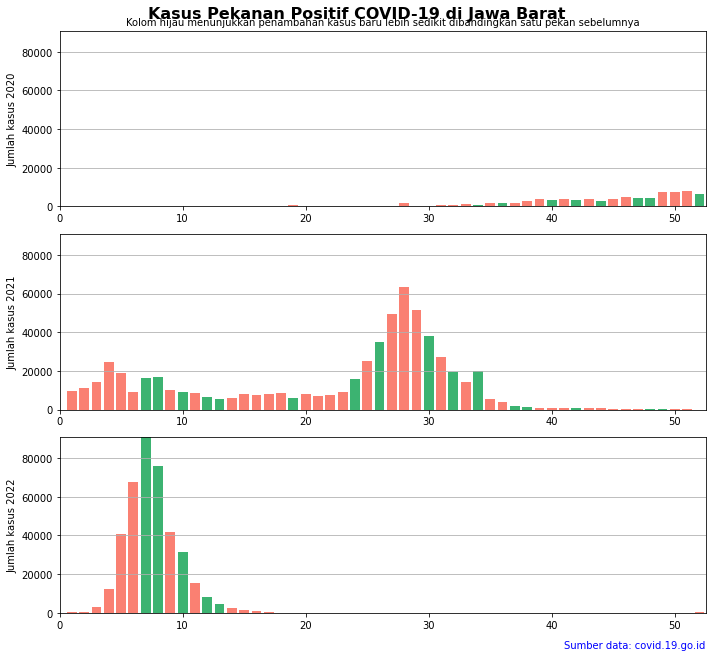

In [5]:
import numpy as np
import pandas as pd
import requests
resp_jabar = requests.get('https://storage.googleapis.com/dqlab-dataset/prov_detail_JAWA_BARAT.json', verify=False)
cov_jabar_raw = resp_jabar.json()
cov_jabar = pd.DataFrame(cov_jabar_raw['list_perkembangan'])

cov_jabar_tidy = (cov_jabar.drop(columns=[item for item in cov_jabar.columns 
                                               if item.startswith('AKUMULASI') 
                                                  or item.startswith('DIRAWAT')])
                           .rename(columns=str.lower)
                           .rename(columns={'kasus': 'kasus_baru'})
                  )
cov_jabar_tidy['tanggal'] = pd.to_datetime(cov_jabar_tidy['tanggal']*1e6, unit='ns')

cov_jabar_pekanan = (cov_jabar_tidy.set_index('tanggal')['kasus_baru']
                                   .resample('W')
                                   .sum()
                                   .reset_index()
                                   .rename(columns={'kasus_baru': 'jumlah'})
                    )
cov_jabar_pekanan['tahun'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.year)
cov_jabar_pekanan['pekan_ke'] = cov_jabar_pekanan['tanggal'].apply(lambda x: x.weekofyear)
cov_jabar_pekanan = cov_jabar_pekanan[['tahun', 'pekan_ke', 'jumlah']]

cov_jabar_pekanan['jumlah_pekanlalu'] = cov_jabar_pekanan['jumlah'].shift().replace(np.nan, 0).astype(np.int)
cov_jabar_pekanan['lebih_baik'] = cov_jabar_pekanan['jumlah'] < cov_jabar_pekanan['jumlah_pekanlalu']

import matplotlib.pyplot as plt

plt.clf()
jml_tahun_terjadi_covid19 = cov_jabar_pekanan['tahun'].nunique()
tahun_terjadi_covid19= cov_jabar_pekanan['tahun'].unique()
fig, axes = plt.subplots(nrows=jml_tahun_terjadi_covid19,
						figsize=(10,3*jml_tahun_terjadi_covid19))

fig.suptitle('Kasus Pekanan Positif COVID-19 di Jawa Barat',
			y=1.00, fontsize=16, fontweight='bold', ha='center')
for i, ax in enumerate(axes):
	ax.bar(data=cov_jabar_pekanan.loc[cov_jabar_pekanan['tahun']==tahun_terjadi_covid19[i]], 
									 x='pekan_ke', height='jumlah',
									  color=['mediumseagreen' if x is True else 'salmon'
						for x in cov_jabar_pekanan['lebih_baik']])
	if i == 0:
		ax.set_title('Kolom hijau menunjukkan penambahan kasus baru lebih sedikit dibandingkan satu pekan sebelumnya',
					fontsize=10)
	elif i == jml_tahun_terjadi_covid19-1:
		ax.text(1, -0.2, 'Sumber data: covid.19.go.id', color='blue',
				   ha='right', transform=ax.transAxes)
			
	ax.set_xlim([0, 52.5])
	ax.set_ylim([0, max(cov_jabar_pekanan['jumlah'])])
	ax.set_xlabel('')
	ax.set_ylabel('Jumlah kasus %d' %(tahun_terjadi_covid19[i],))
	ax.grid(axis='y')
			
plt.tight_layout()
plt.show()